In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('STI_1994-2002.csv').dropna()
print(df)

           Date         Day  index level  contcpdret  d1  d2  d3  d4  d5
1      12/7/1994    Tuesday      1777.27    0.007976   0   1   0   0   0
2      13/7/1994  Wednesday      1796.27    0.010634   0   0   1   0   0
3      14/7/1994   Thursday      1815.75    0.010786   0   0   0   1   0
4      15/7/1994     Friday      1826.39    0.005843   0   0   0   0   1
5      18/7/1994     Monday      1830.93    0.002483   1   0   0   0   0
...          ...        ...          ...         ...  ..  ..  ..  ..  ..
2155  14/10/2002     Monday      1378.44    0.003452   1   0   0   0   0
2156  15/10/2002    Tuesday      1429.68    0.036498   0   1   0   0   0
2157  16/10/2002  Wednesday      1439.05    0.006533   0   0   1   0   0
2158  17/10/2002   Thursday      1466.02    0.018568   0   0   0   1   0
2159  18/10/2002     Friday      1461.39   -0.003163   0   0   0   0   1

[2159 rows x 9 columns]


In [3]:
dat1 = df[df['d1'] != 0] ### dat1 contains only Monday returns
dat1.reset_index(drop=True, inplace=True) 
### this is important to reset index to 0,1,2,... so that when concatenating - they align
print(dat1)

          Date      Day  index level  contcpdret  d1  d2  d3  d4  d5
0     18/7/1994  Monday      1830.93    0.002483   1   0   0   0   0
1     25/7/1994  Monday      1848.22    0.008716   1   0   0   0   0
2      1/8/1994  Monday      1882.05    0.015043   1   0   0   0   0
3      8/8/1994  Monday      1889.47   -0.008207   1   0   0   0   0
4     15/8/1994  Monday      1903.88   -0.006450   1   0   0   0   0
..          ...     ...          ...         ...  ..  ..  ..  ..  ..
426   16/9/2002  Monday      1442.61    0.007382   1   0   0   0   0
427   23/9/2002  Monday      1415.82   -0.003673   1   0   0   0   0
428   30/9/2002  Monday      1352.30   -0.015839   1   0   0   0   0
429   7/10/2002  Monday      1378.61    0.008040   1   0   0   0   0
430  14/10/2002  Monday      1378.44    0.003452   1   0   0   0   0

[431 rows x 9 columns]


In [4]:
dat2 = df[df['d2'] != 0] ### dat2 contains only Tuesday returns
dat2.reset_index(drop=True, inplace=True) 
### 
dat3 = df[df['d3'] != 0] ### dat3 contains only Wed returns
dat3.reset_index(drop=True, inplace=True) 
### 
dat4 = df[df['d4'] != 0] ### dat4 contains only Thurs returns
dat4.reset_index(drop=True, inplace=True) 
### 
dat5 = df[df['d5'] != 0] ### dat5 contains only Fri returns
dat5.reset_index(drop=True, inplace=True) 

In [5]:
df = df.drop("Date ",axis=1)
df

,Day,index level,contcpdret,d1,d2,d3,d4,d5
1,Tuesday,1777.27,0.007976,0,1,0,0,0
2,Wednesday,1796.27,0.010634,0,0,1,0,0
3,Thursday,1815.75,0.010786,0,0,0,1,0
4,Friday,1826.39,0.005843,0,0,0,0,1
5,Monday,1830.93,0.002483,1,0,0,0,0
...,...,...,...,...,...,...,...,...
2155,Monday,1378.44,0.003452,1,0,0,0,0
2156,Tuesday,1429.68,0.036498,0,1,0,0,0
2157,Wednesday,1439.05,0.006533,0,0,1,0,0
2158,Thursday,1466.02,0.018568,0,0,0,1,0


In [6]:
###
f=df.groupby('Day').mean()
f.rename(columns={'contcpdret': 'Mean'}, inplace=True)
f1=f['Mean']

g=df.groupby('Day').var()  ### note .var() here is biased, i.e., divisor is sample size
g.rename(columns={'contcpdret': 'Variance'}, inplace=True)
g1=np.sqrt(g['Variance'])

t1=np.sqrt(431)*f1/g1

In [7]:
table1 = pd.concat([f1,g1,t1],axis=1,keys=['Mean','Std Dev','t-stats'])
table1=table1.reindex(['Monday', 'Tuesday','Wednesday','Thursday','Friday'])
print(table1)

               Mean   Std Dev   t-stats
Day                                    
Monday    -0.001817  0.018189 -2.073917
Tuesday   -0.000269  0.012848 -0.435291
Wednesday  0.000614  0.014389  0.885816
Thursday   0.000393  0.014040  0.581614
Friday     0.000640  0.013283  1.000924


In [8]:
### Choose first half of data
data1 = df.iloc[0:1079,]
#import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'contcpdret ~ d1 + d2 + d3 + d4 + d5 - 1'
results = ols(formula, data1).fit()
print(results.summary())
### Note: adding ' -1 ' removes constant or intercept
### Note that if we remove the  - 1, this statsmodel program still runs and shows regression results,
###   but warns of singular matrix -- other programs e.g. R would not return any result

                            OLS Regression Results                            
Dep. Variable:             contcpdret   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.935
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.102
Time:                        15:36:20   Log-Likelihood:                 3094.4
No. Observations:                1079   AIC:                            -6179.
Df Residuals:                    1074   BIC:                            -6154.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
d1            -0.0024      0.001     -2.605      0.0

In [9]:
### There appears to be a negative Monday effect significantly diff from zero at 1% 
hypotheses = 'd1=d5, d2=d5, d3=d5, d4=d5'
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0021      0.001     -1.552      0.121      -0.005       0.001
c1            -0.0007      0.001     -0.534      0.594      -0.003       0.002
c2             0.0015      0.001      1.166      0.244      -0.001       0.004
c3          -4.05e-05      0.001     -0.031      0.976      -0.003       0.003


In [10]:
### Above are t-test of c0: d1-d5 if this is statistically different from zero; of c1: d2-d5 if this is statistically different 
###  from zero; and so on. Monday eff not so neg strong here (statistically same as Fri) -- shows diff stat test can produce slightly diff result due to
###  their power (here do not reject H_0 even if false -- Type II error)

In [11]:
np.var(results.resid) ### gives biased estimate of variance, i.e., denominator is 1079

0.00018903784687854413

In [12]:
v=np.sum(np.square(results.resid- np.mean(results.resid)))/1074 ### gives unbiased estimate of variance

In [13]:
sigma=np.sqrt(v)

In [14]:
print(data1[['d1','d2','d3','d4','d5']])

      d1  d2  d3  d4  d5
1      0   1   0   0   0
2      0   0   1   0   0
3      0   0   0   1   0
4      0   0   0   0   1
5      1   0   0   0   0
...   ..  ..  ..  ..  ..
1075   1   0   0   0   0
1076   0   1   0   0   0
1077   0   0   1   0   0
1078   0   0   0   1   0
1079   0   0   0   0   1

[1079 rows x 5 columns]


In [15]:
bigX = data1[['d1','d2','d3','d4','d5']].to_numpy()
bigX.shape ### this is (1079,5)
print(bigX)
print(bigX.T)
bigXT = bigX.T ### bigXT.shape is (5,1079)
XX = (bigXT).dot (bigX)
print(XX)

[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 ...
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 1 0 0]
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[[215   0   0   0   0]
 [  0 216   0   0   0]
 [  0   0 216   0   0]
 [  0   0   0 216   0]
 [  0   0   0   0 216]]


In [16]:
# creating two matrices
R = np.array([[1, 0, 0, 0, -1],[0, 1, 0, 0, -1],[0, 0, 1, 0, -1],[0, 0, 0, 1, -1]])
r = np.array([[0],[0],[0],[0]])
print("Matrix R :")
print(R)
print("Matrix r :")
print(r)

Matrix R :
[[ 1  0  0  0 -1]
 [ 0  1  0  0 -1]
 [ 0  0  1  0 -1]
 [ 0  0  0  1 -1]]
Matrix r :
[[0]
 [0]
 [0]
 [0]]


In [17]:
B=results.params
b=B.to_numpy() ### first, convert to numpy array
### to convert from (5,) or 1-dim to (5,1) or 2-dim for np matrix multiplication
beta = b.reshape(5, 1)
print(beta)
beta.shape

[[-0.00244794]
 [-0.00109552]
 [ 0.00115846]
 [-0.00042827]
 [-0.00038777]]


(5, 1)

In [18]:
M = R.dot(np.linalg.inv(XX)).dot(R.T)
F=(((R.dot (beta)-r).T).dot(np.linalg.inv(M)).dot(R.dot (beta)-r)/4)/((1079*(sigma)**2)/1074)
print(F)
### Note this is F with d.f. 4, N-k 

[[1.92562166]]


In [19]:
import scipy.stats
f=F
dfn=4
dfd=1079-5
p = 1-scipy.stats.f.cdf(f, dfn, dfd)
print(p)

[[0.1039409]]


In [20]:
### Hence do not reject H_0: 'd1=d5, d2=d5, d3=d5, d4=d5' at 10% significance level

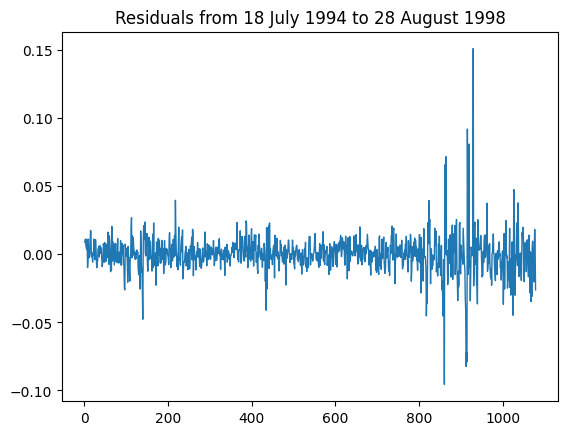

In [21]:
import matplotlib.pyplot as plt
plt.plot(results.resid,linestyle="-",linewidth=1)
plt.title('Residuals from 18 July 1994 to 28 August 1998')
plt.show()

In [22]:
One=np.ones([len(data1['d1']),1])
One=pd.DataFrame(One)

In [23]:
Dx=pd.concat([data1['d1'],data1['d2'],data1['d3'],data1['d4'],data1['d5']],axis=1)
Dx1=pd.concat([One,data1['d2'],data1['d3'],data1['d4'],data1['d5']],axis=1)  ### leaves out d1 to avoid dummy var trap
print(Dx1)

        0   d2   d3   d4   d5
0     1.0  NaN  NaN  NaN  NaN
1     1.0  1.0  0.0  0.0  0.0
2     1.0  0.0  1.0  0.0  0.0
3     1.0  0.0  0.0  1.0  0.0
4     1.0  0.0  0.0  0.0  1.0
...   ...  ...  ...  ...  ...
1075  1.0  0.0  0.0  0.0  0.0
1076  1.0  1.0  0.0  0.0  0.0
1077  1.0  0.0  1.0  0.0  0.0
1078  1.0  0.0  0.0  1.0  0.0
1079  NaN  0.0  0.0  0.0  1.0

[1080 rows x 5 columns]


In [24]:
### Test for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
Dx = sm.add_constant(Dx)
bp_test = het_breuschpagan(results.resid,Dx)
print ('LM-test chi-sq:', bp_test[0], 'LM-test p_value:', bp_test[1])
### This tests with 4 deg freedom
### It is similar to testing constraint of reg resid^2 coefs on d2, d3, d4, d5 = 0. One df is dropped as regression of hat u^2
###  requires to accommodate a positive constant. Hence not 5 d.f.

LM-test chi-sq: 6.7462080881055 LM-test p_value: 0.24020963463255665


In [25]:
import scipy.stats
#find Chi-Square critical value
scipy.stats.chi2.ppf(1-0.14870642721331848, df=4)
### ppf(1-signific level, df)

6.767333462342314

In [26]:
### White's Heteroskedasticity Test
from statsmodels.stats.diagnostic import het_white
Dx = sm.add_constant(Dx)
wh_test = het_white(results.resid,Dx)
print ('LM-test chi-sq:', wh_test[0], 'LM-test p_value:', wh_test[1])
### Note also 4 d.f. since dumy * other dummy = 0, and dummy^2 = same dummy of one, hence no new regressors

LM-test chi-sq: 6.758427299652376 LM-test p_value: 0.14921837028476065


In [27]:
### Hence cannot reject null of no heteroskedasticity

In [28]:
resid_fit = sm.OLS(
    np.asarray(results.resid)[1:], sm.add_constant(np.asarray(results.resid)[:-1])
).fit()
print(resid_fit.tvalues[1])
print(resid_fit.pvalues[1])
rho = resid_fit.params[1]
print(rho)

5.599107600370422
2.734042332667434e-08
0.16850705336533983


In [29]:
### High t-value of resid on its lag indicates e(t) = const + 0.1685 e(t-1) + error

# Perform GLS below

In [30]:
from scipy.linalg import toeplitz
trix = toeplitz(range(len(results.resid))) ### trix is sq matrix with zero in diag, 1 in first off diag, 2 in 2nd off diag, etc.
sigma = rho ** trix ### this is cov matrix of residuals except the factor of sigma_u^2 is left out
gls_model = sm.GLS(data1['contcpdret'], Dx, sigma=sigma)
gls_results = gls_model.fit()

In [31]:
print(gls_results.summary())

                            GLS Regression Results                            
Dep. Variable:             contcpdret   R-squared:                       0.007
Model:                            GLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.526
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.179
Time:                        15:36:21   Log-Likelihood:                 3109.6
No. Observations:                1079   AIC:                            -6207.
Df Residuals:                    1073   BIC:                            -6177.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.948e+10   1.07e+11     -0.743      0.4

In [32]:
### This autocorr adjusted reg compared with the OLS reg earlier shows:-
###  slightly better results, viz. t-stats for d1 coeff is more neg, R^2 is higher, 
###  F-stat is higher, DW stats now close to 2

In [33]:
var0=np.var(gls_results.resid)*1079/1074  # get unbiased variance
print(var0,np.sqrt(var0))  ### regression residual error vola

0.00018993310765986031 0.013781622098282202


In [34]:
### Here we perform a HAC (heteroskedasticity-autocorrelation consistent cov estimator)

In [35]:
from statsmodels.formula.api import ols
model = sm.OLS(data1['contcpdret'], Dx)
ols_hc = model.fit(cov_type="HC3")
print(ols_hc.summary())

                            OLS Regression Results                            
Dep. Variable:             contcpdret   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                    0.3655
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.546
Time:                        15:36:21   Log-Likelihood:                 3094.4
No. Observations:                1079   AIC:                            -6179.
Df Residuals:                    1074   BIC:                            -6154.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.859e+10   4.73e+10      0.605      0.5

C:\Users\bryan\OneDrive\Desktop\python\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [36]:
### Note above results are close to the previous case adjusting for GLS. But DW stats still indicates pos autocorr
### HC3 -- MacKinnon and White’s (1985) heteroskedasticity robust standard errors.
###   Notes. Defined as (X.T X)^(-1)X.T diag(e_i^(2)/(1-h_ii)^(2)) X(X.T X)^(-1) where h_ii = x_i(X.T X)^(-1)x_i.T.

# Now test data for next period 

In [37]:
data2 = df.iloc[1079:2159,]
#import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'contcpdret ~ d1 + d2 + d3 + d4 + d5 - 1'
results2 = ols(formula, data2).fit()
print(results2.summary())
### Note: adding ' -1 ' removes constant or intercept
### Note that if we remove the  - 1, this statsmodel program still runs and shows regression results,
###   but warns of singular matrix -- other programs e.g. R would not return any result

                            OLS Regression Results                            
Dep. Variable:             contcpdret   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.104
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.353
Time:                        15:36:21   Log-Likelihood:                 2970.2
No. Observations:                1080   AIC:                            -5930.
Df Residuals:                    1075   BIC:                            -5906.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
d1            -0.0012      0.001     -1.127      0.2

In [38]:
### Note: In latter period, the Monday neg eff seemed to have disappeared

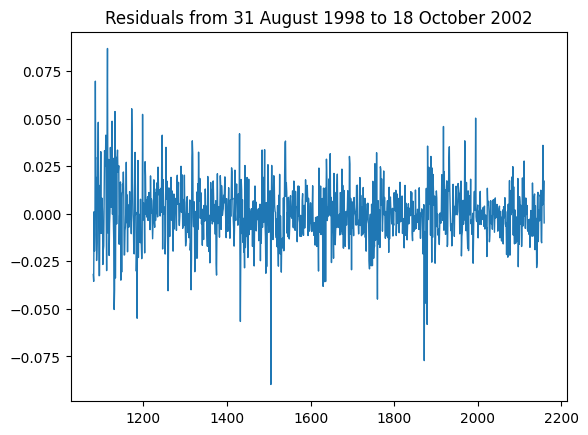

In [39]:
import matplotlib.pyplot as plt
plt.plot(results2.resid,linestyle="-",linewidth=1)
plt.title('Residuals from 31 August 1998 to 18 October 2002')
plt.show()